In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [47]:
file_path = 'Dados/train.csv'
data = pd.read_csv(file_path)
colunas = [
#    "id",
    "Gender",
    "Age",
    "Height",
    "Weight",
    "family_history_with_overweight",
    "FAVC",
    "FCVC",
    "NCP",
    "CAEC",
    "SMOKE",
    "CH2O",
    "SCC",
    "FAF",
    "TUE",
    "CALC",
    "MTRANS",
#    "NObeyesdad"
]
target = data["NObeyesdad"]
data = data[colunas]

In [48]:
#Verificando o balanceamento dos dados de saída
target.value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [49]:
data.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
dtype: object

In [50]:
categoricos = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]
for col in categoricos:
    unique_values = data[col].unique()
    print("Valores únicos na coluna ", col, unique_values)

Valores únicos na coluna  Gender ['Male' 'Female']
Valores únicos na coluna  family_history_with_overweight ['yes' 'no']
Valores únicos na coluna  FAVC ['yes' 'no']
Valores únicos na coluna  CAEC ['Sometimes' 'Frequently' 'no' 'Always']
Valores únicos na coluna  SMOKE ['no' 'yes']
Valores únicos na coluna  SCC ['no' 'yes']
Valores únicos na coluna  CALC ['Sometimes' 'no' 'Frequently']
Valores únicos na coluna  MTRANS ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']


In [51]:
encoder = LabelEncoder()
data["family_history_with_overweight"] = encoder.fit_transform(data["family_history_with_overweight"])
data["FAVC"] = encoder.fit_transform(data["FAVC"])
data["SMOKE"] = encoder.fit_transform(data["SMOKE"])
data["SCC"] = encoder.fit_transform(data["SCC"])
data["Gender"] = encoder.fit_transform(data["Gender"])

In [52]:
categories = [['no', 'Sometimes', 'Frequently', 'Always']]
encoder = OrdinalEncoder(categories=categories)
data['CAEC'] = encoder.fit_transform(data[['CAEC']])
encoder = OrdinalEncoder(categories=[['no', 'Sometimes', 'Frequently']])
data['CALC'] = encoder.fit_transform(data[['CALC']])

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  int64  
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  int64  
 5   FAVC                            20758 non-null  int64  
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  float64
 9   SMOKE                           20758 non-null  int64  
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  int64  
 12  FAF                             

In [54]:
#Realizar one hot encoding na coluna MTRANS
data = pd.get_dummies(data, columns=["MTRANS"])

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2, random_state=42, stratify=target)

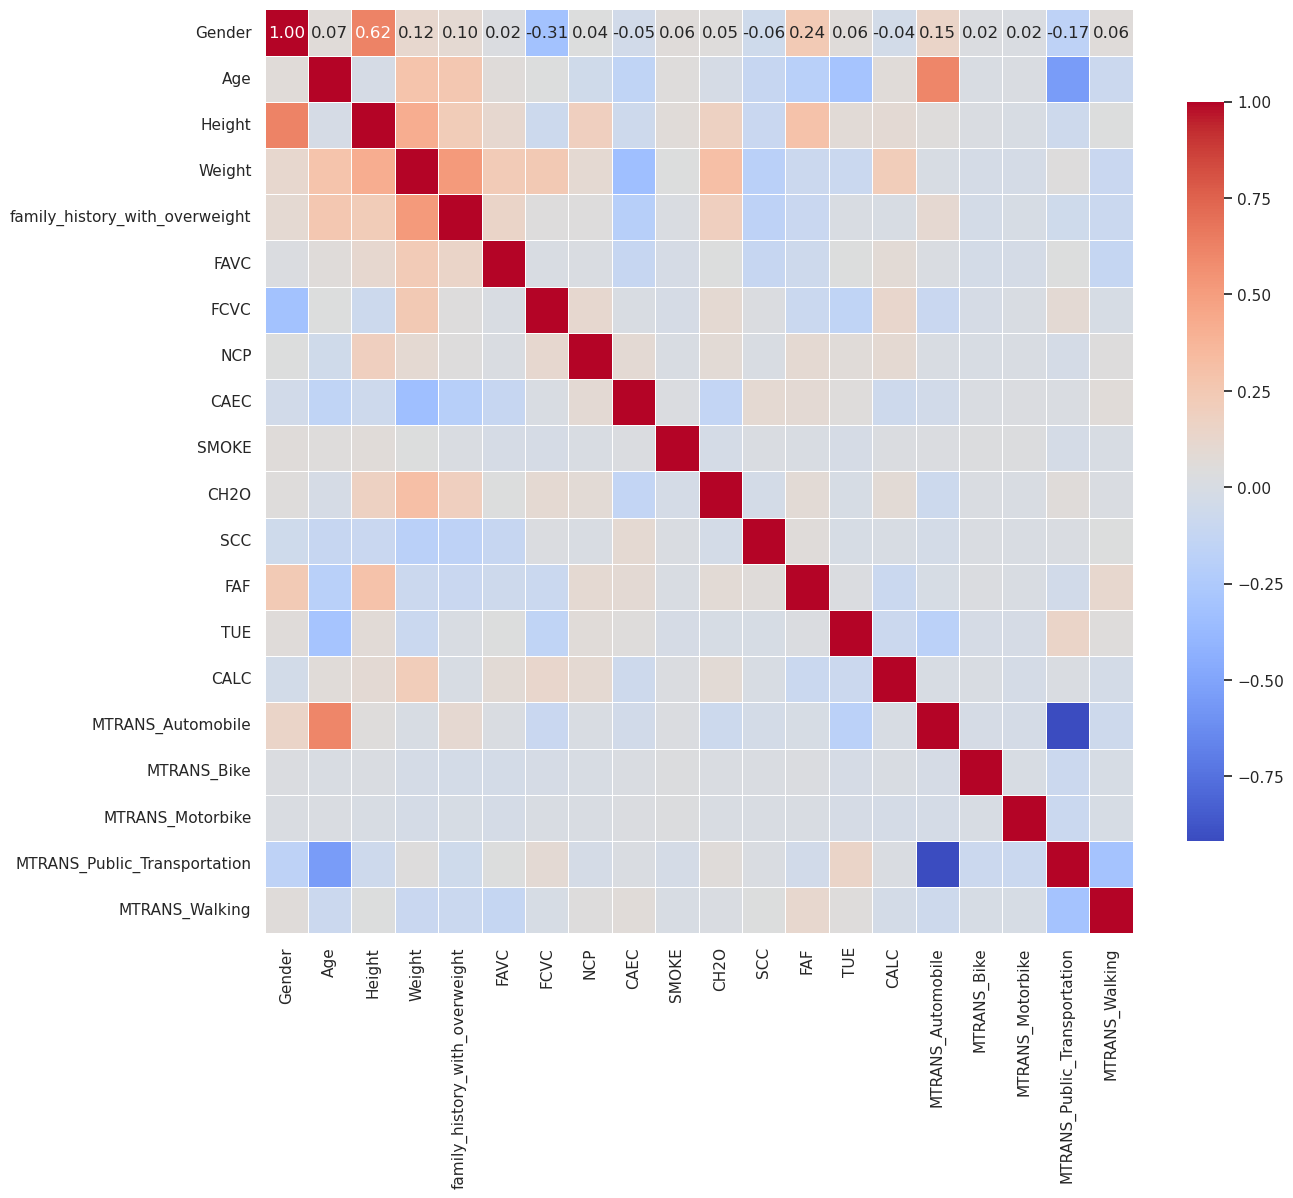

In [56]:
#Verificando a correlação entre os atributos
correlation_matrix = data.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, cbar_kws={'shrink': .8})

In [57]:
#Percebemos uma forte correlação negativa entre o transporte público e o automóvel
colunas = ["MTRANS_Automobile", "MTRANS_Bike" , "MTRANS_Motorbike" ,"MTRANS_Public_Transportation", "MTRANS_Walking"]
for coluna in colunas:
    print(X_train[coluna].value_counts())

MTRANS_Automobile
False    13765
True      2841
Name: count, dtype: int64
MTRANS_Bike
False    16583
True        23
Name: count, dtype: int64
MTRANS_Motorbike
False    16578
True        28
Name: count, dtype: int64
MTRANS_Public_Transportation
True     13349
False     3257
Name: count, dtype: int64
MTRANS_Walking
False    16241
True       365
Name: count, dtype: int64


In [58]:
#Dada a baixa quantidade de valores em motos, bikes e a pé, aglutinaremos eles com os carros em uma coluna de tranporte pessoal
X_test["MTRANS_PESSOAL"] = X_test["MTRANS_Automobile"] | X_test["MTRANS_Bike"] | X_test["MTRANS_Motorbike"] | X_test["MTRANS_Walking"]
X_train["MTRANS_PESSOAL"] = X_train["MTRANS_Automobile"] | X_train["MTRANS_Bike"] | X_train["MTRANS_Motorbike"] | X_train["MTRANS_Walking"]

In [59]:
colunas = ["MTRANS_Public_Transportation", "MTRANS_PESSOAL"]
print(len(X_train))
for coluna in colunas:
    print(X_train[coluna].value_counts())
X_train.drop(["MTRANS_Automobile", "MTRANS_Bike" , "MTRANS_Motorbike" , "MTRANS_Walking"], axis=1, inplace=True)
X_test.drop(["MTRANS_Automobile", "MTRANS_Bike" , "MTRANS_Motorbike" , "MTRANS_Walking"], axis=1, inplace=True)

16606
MTRANS_Public_Transportation
True     13349
False     3257
Name: count, dtype: int64
MTRANS_PESSOAL
False    13349
True      3257
Name: count, dtype: int64


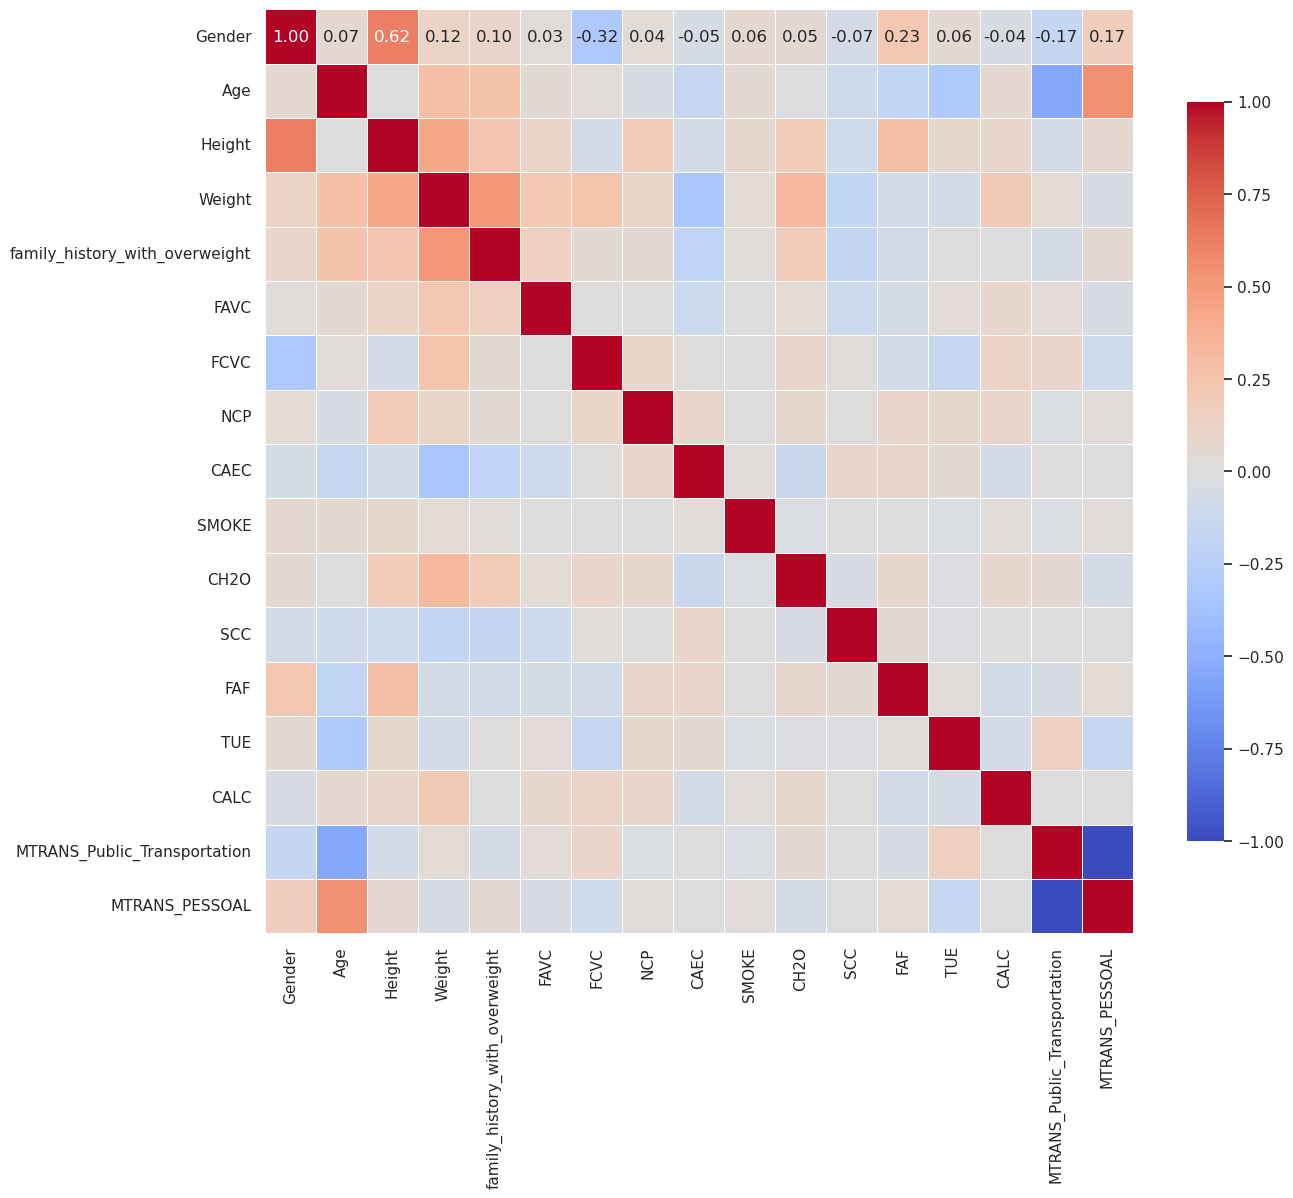

In [60]:
correlation_matrix = X_train.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, cbar_kws={'shrink': .8})

/home/saviobarreto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/saviobarreto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/saviobarreto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/saviobarreto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

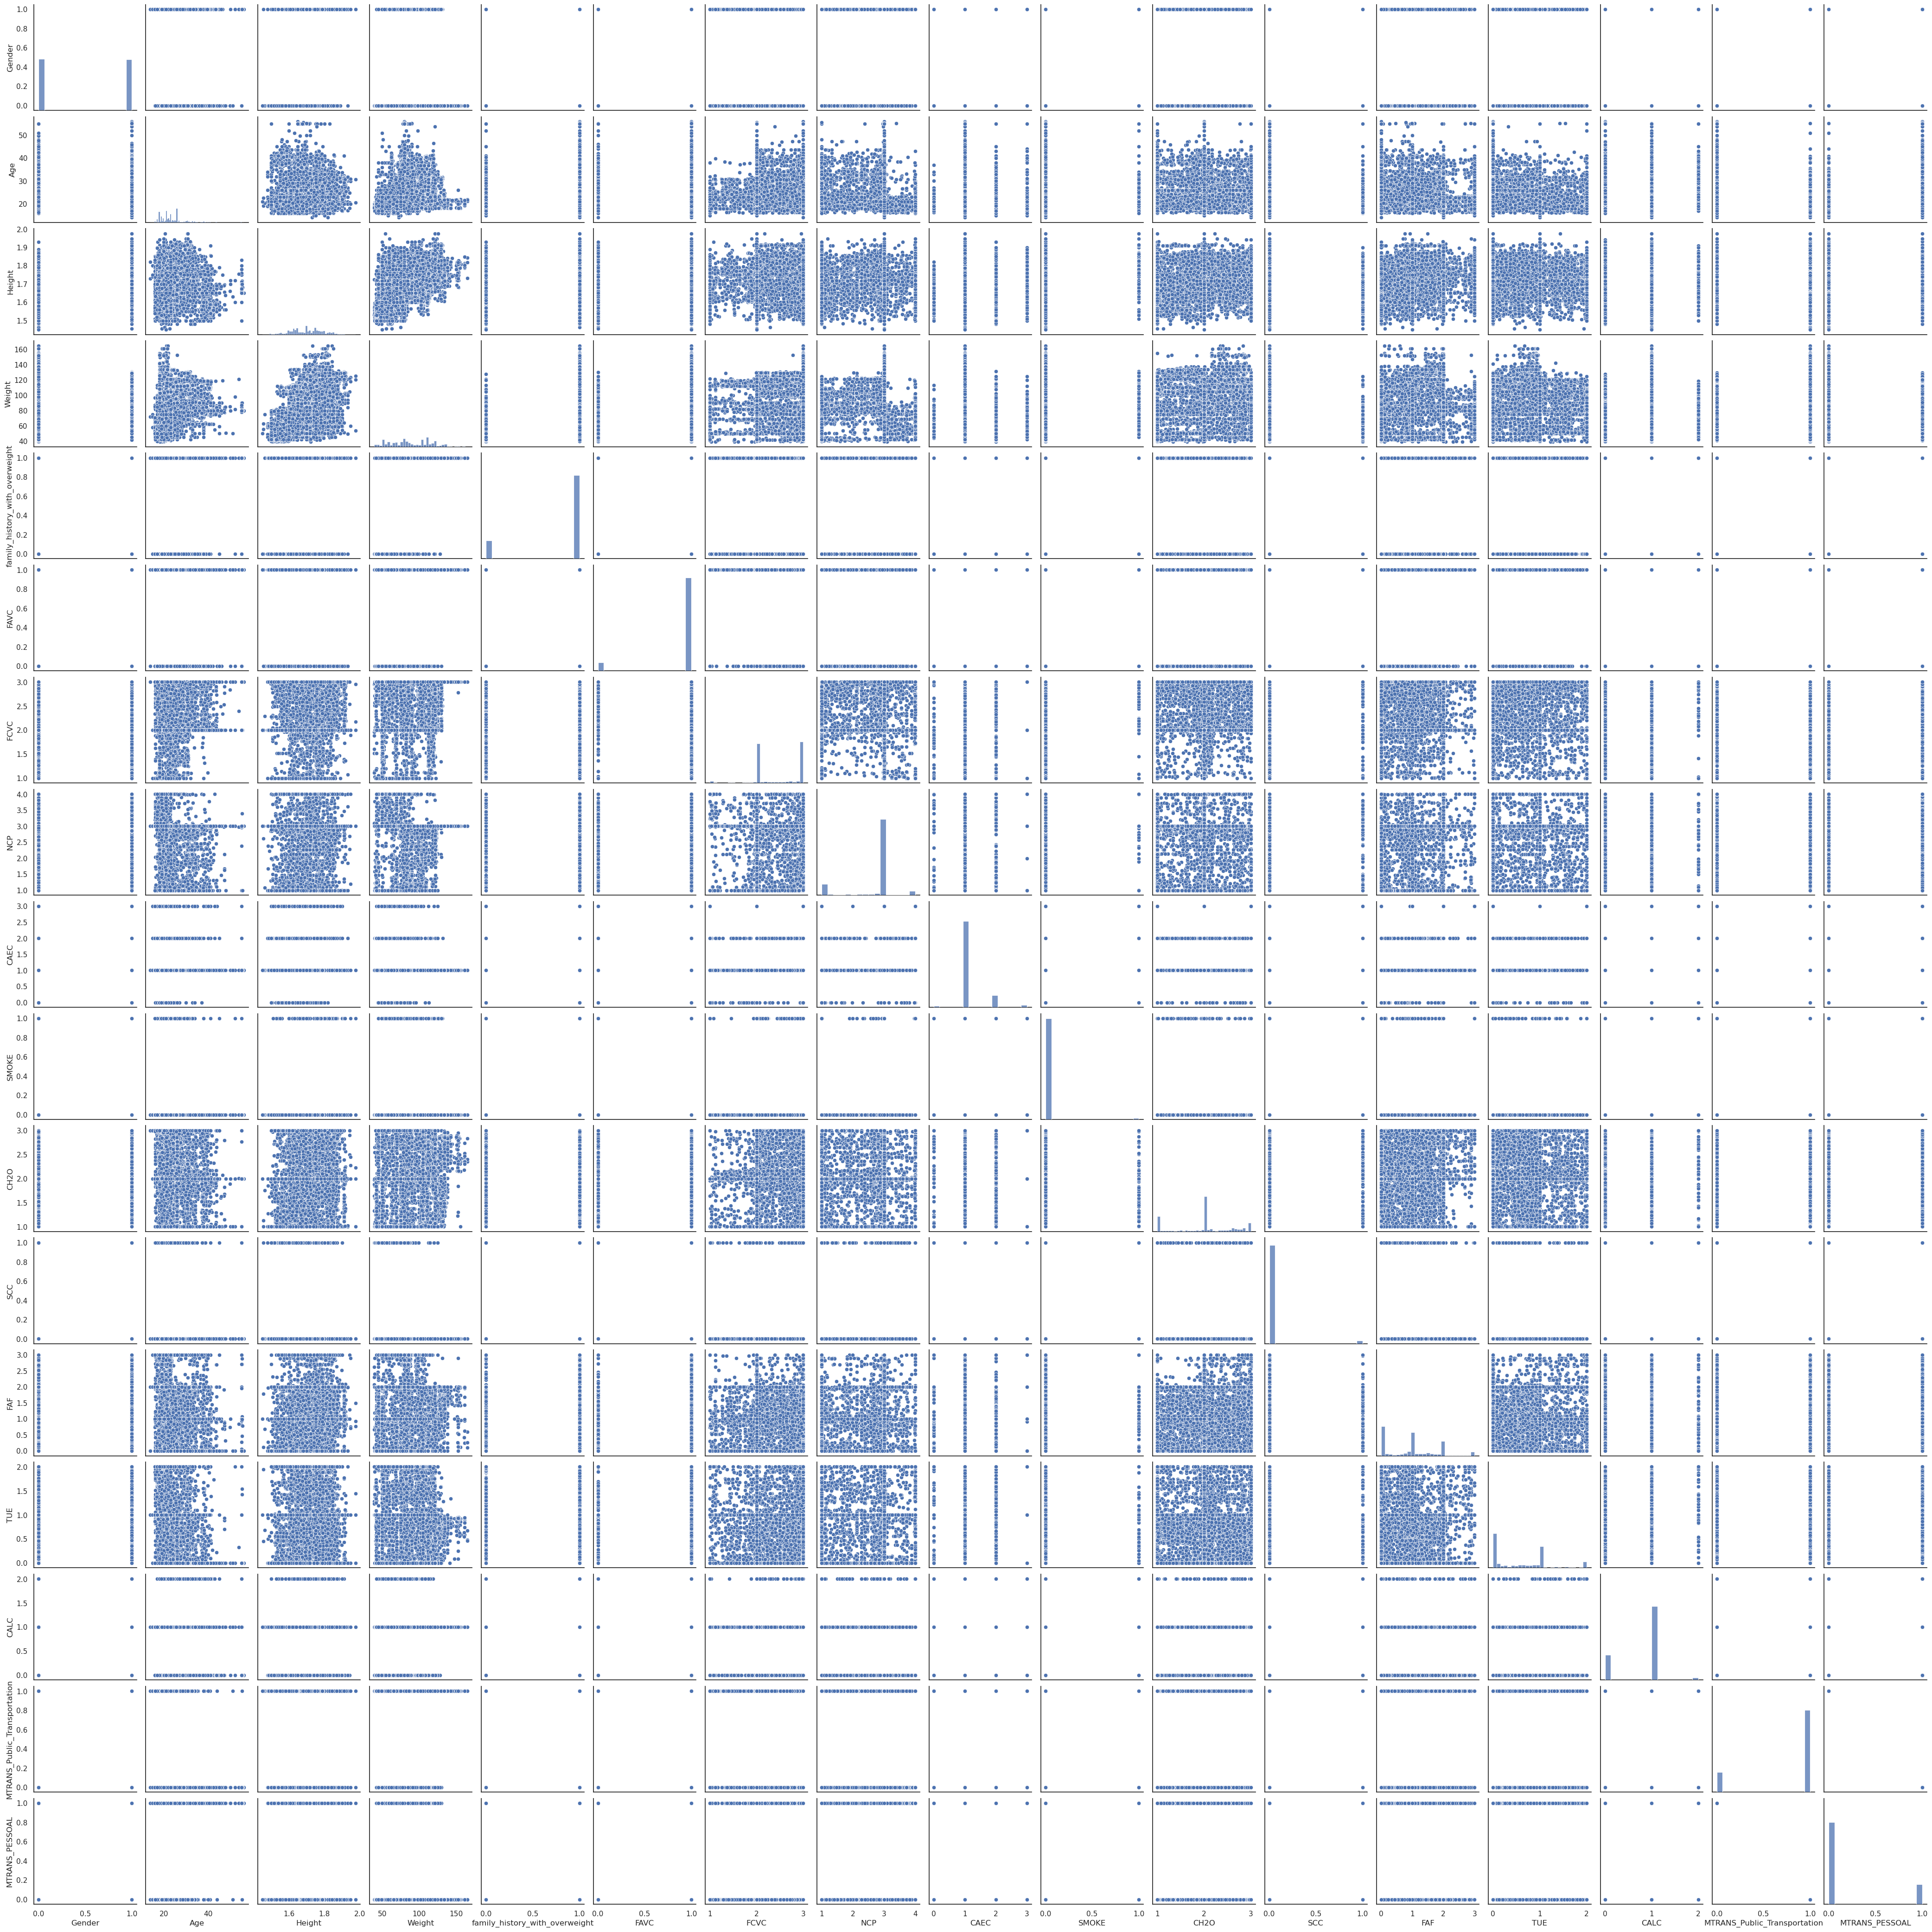

In [61]:
sns.pairplot(X_train)

In [62]:
#Uniformizando a distribuição dos dados pela normal
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [65]:
#Testando a quantidade de componentes do PCA utilizando a Variância explicada
pca_train = PCA()
pca_test = PCA()

pca_train.fit(X_train)
pca_test.fit(X_test)

variancia_train = np.cumsum(pca_train.explained_variance_ratio_)
variancia_test = np.cumsum(pca_test.explained_variance_ratio_)


In [69]:
#Define quantas componentes acumuladas conseguem atingir determinado grau de variância
limiar_variancia = 0.90
n_components_train = np.where(variancia_train >= limiar_variancia)[0][0] + 1
n_components_test = np.where(variancia_test >= limiar_variancia)[0][0] + 1

print(n_components_test)
print(n_components_train)

12
12


In [70]:
#Gerando os dados transformados com o PCA
pca_train = PCA(n_components=n_components_train)
pca_test = PCA(n_components=n_components_test)
X_pca_test = pca_test.fit_transform(X_test)
X_pca_train = pca_train.fit_transform(X_train)